# Two point correlation function: Multipole decomposition

## Author: Cesar Arroyo Cardenas

In [1]:
%reset
# Import required libraries.
import numpy as np # Package for n-dimensional scientific computing.
from matplotlib import pyplot as plt # Quick plot module from the MatPlotLib package.

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


The workflow to be followed is the one described in the document: [Trabajo Grupo Cosmologia](https://docs.google.com/document/d/1mjUArJLjMPIflmWkiw5SJPDx5dBEqVSlLOUST4uWll8/edit).

### Description of files

In this notebook I will generate a multipole decomposition for a **CUTE output file**. The source file is a .xi file which corresponds to a calculation of the 2 point correlation function (2PCF) generated with given data and random files by the CUTE software.

I will describe the output according to the CUTE version used and the output format given. The type of correlation calculated by CUTE is in the parameter file as
```
corr_type= 3D_rm
```

According to the verbal and written documentation obtained, this corresponds to a output of the form 
```
For the 3-D correlation functions the output file has 7 columns with
   mu   r   xi(mu,r)   errxi(mu,r)   DD   DR   RR
```
> **Note:** This must be taken with a grain of salt. There is still some confusion about the output format.

We will now follow the suggested steps in the last meeting to construct the multipoles for one single file.

### Analysis of the .xi file

The first thing to do is to inspect the .xi file in order to get a feeling about what we've obtained by running CUTE.

In [2]:
data = np.loadtxt('qpm_mock_ELG_NGC_0001.xi', usecols = (0,1,2,4,5,6))
mu = data[:, 0]
r = data[:, 1]

print(data.shape)
print(np.unique(mu, return_counts=True))
print(np.unique(r, return_counts=True))

# The mu and r form a 200*100 grid.
# Each value of mu appears 200 times and each value of r appears 100 times.



(20000L, 6L)
(array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
       0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
       0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
       0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355,
       0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445,
       0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535,
       0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625,
       0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715,
       0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805,
       0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895,
       0.905, 0.915, 0.925, 0.935, 0.945, 0.955, 0.965, 0.975, 0.985,
       0.995]), array([200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200,

 Let's see if we can plot contour surfaces for $DD(\mu,r)$, $DR(\mu,r)$ and $RR(\mu,r)$.

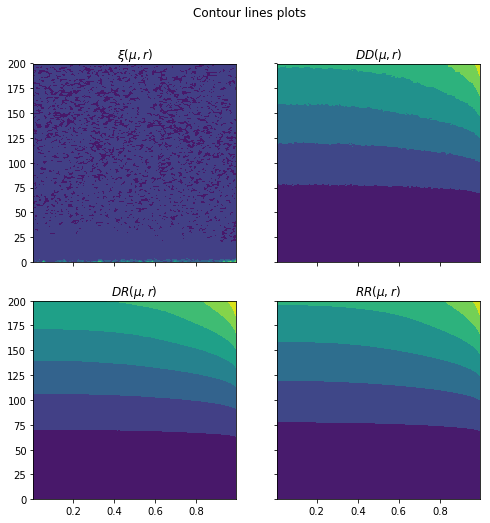

In [18]:
shape = (200, 100) # Shape 
MU = mu.reshape(shape)
R = r.reshape(shape)
XI = np.reshape(data[:, 2], shape)
DD = np.reshape(data[:, 3], shape)
DR = np.reshape(data[:, 4], shape)
RR = np.reshape(data[:, 5], shape)

f, ((axXI, axDD), (axDR, axRR)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8,8))
f.suptitle("Contour lines plots")
axXI.set_title(r"$\xi(\mu,r)$")
axXI.contourf(MU, R, XI)
axDD.set_title(r"$DD(\mu,r)$")
axDD.contourf(MU, R, DD)
axDR.set_title(r"$DR(\mu,r)$")
axDR.contourf(MU, R, DR)
axRR.set_title(r"$RR(\mu,r)$")
axRR.contourf(MU, R, RR)

plt.show()

Next step is to try to calculate the normalized $DD$, $DR$ and $RR$ and plot them.

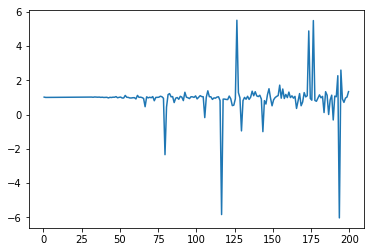

In [36]:
# Read the weights
nd = np.sum(np.loadtxt("qpm_mock_anymask_ELG_recon_specweightsSGC_0001.rdz", usecols = 3))
nr = 1112665.55362

normdd = nd*(nd - 1.)
normdr = nd*nr
normrr = nr*(nr - 1.)

DD = np.zeros(200)
DR = np.zeros(200)
RR = np.zeros(200)
XIdat = np.zeros(200)

# Average of DDs and DRs
for i in np.arange(200):
    DD[i] = np.mean(data[100*i:100*(i+1),3])
    DR[i] = np.mean(data[100*i:100*(i+1),4])
    RR[i] = np.mean(data[100*i:100*(i+1),5])
    XIdat[i] = np.mean(data[100*i:100*(i+1),2])
    
# Normalize the DD, DR and RR
DD = DD/normdd
DR = DR/normdr
RR = RR/normrr
XIcal = (DD - DR + RR)/RR
    
r_arr = np.unique(r)
#plt.plot(r_arr, DD, 'r', r_arr, DR, 'b', r_arr, RR, 'g-', r_arr, RR*DD, 'o')
plt.plot(r_arr, XIdat/XIcal)
plt.show()

In [30]:
DD = data[:, 3]
DR = data[:, 4]
RR = data[:, 5]

# Normalize the DD, DR and RR
DD = DD/normdd
DR = DR/normdr
RR = RR/normrr

XI = (DD - DR + RR)/RR
mu_unique = np.unique(mu)
dmu = np.mean(np.diff(mu_unique))

monopole = []
quadrupole = []

mon = 0.

for ii in np.arange(len(r)):
    for jj in np.arange(100*i,100*(i+1)):
        mon += dmu*


In [30]:
rebin = 8
DD = data[4]
DR = data[5]
RR = data[6]
#print(DD.shape, DD.T.shape)
#print(DD)
#print

# NumPy understands the shape of a vector the same independently if it's transposed or
# if it's normal.

# The reshaping is done in a row-wise fashion.

# r changes every 100 rows in original file
# Single row constitutes DD values for constant r and varying mu.

DD = DD.reshape((200, 100))
DR = DR.reshape((200, 100))
RR = RR.reshape((200, 100))

DD1 = np.zeros((25, 100))
DR1 = np.zeros((25, 100))
RR1 = np.zeros((25, 100))

#DD1 = DD[:200:8, :]
#print(DD1.shape)
#print(DD1)
for i in range(rebin):
    DD1 = DD1 + DD[i:200:8, :]
    DR1 = DR1 + DR[i:200:8, :]
    RR1 = RR1 + RR[i:200:8, :]
    
print
print(DD1.shape)

DD = DD1/float(rebin)
DR = DR1/float(rebin)
RR = RR1/float(rebin)

#MU, R = np.meshgrid(data[0,:], data[1,:])
#XI = np.reshape(data[2,:], MU.shape)

#print(type(MU), type(R), type(XI))
#print(MU.shape, R.shape, XI.shape)
#plt.pcolormesh(MU, R, XI)
#plt.show()

(200L, 100L)
[[5.969113e-01 0.000000e+00 3.844141e-01 ... 1.361391e+00 1.462756e+00
  2.152207e+00]
 [1.537218e+00 3.034805e+00 1.165450e+00 ... 2.681277e+00 4.246948e+00
  8.672336e+00]
 [3.707849e+00 5.540362e+00 4.154277e+00 ... 7.538443e+00 9.666888e+00
  1.242335e+01]
 ...
 [6.067322e+03 6.033845e+03 6.118081e+03 ... 8.920328e+03 9.283779e+03
  9.676513e+03]
 [6.086632e+03 6.050224e+03 6.032172e+03 ... 8.953834e+03 9.334120e+03
  9.874366e+03]
 [6.130642e+03 6.067849e+03 6.137701e+03 ... 8.966835e+03 9.370725e+03
  9.838296e+03]]

(25L, 100L)
[[5.969113e-01 0.000000e+00 3.844141e-01 ... 1.361391e+00 1.462756e+00
  2.152207e+00]
 [2.862494e+01 2.424789e+01 2.721905e+01 ... 2.415676e+01 2.912895e+01
  2.794514e+01]
 [7.942699e+01 8.296675e+01 7.947528e+01 ... 8.553414e+01 7.237081e+01
  7.933421e+01]
 ...
 [5.123786e+03 5.195225e+03 5.183860e+03 ... 7.621709e+03 7.808648e+03
  8.038541e+03]
 [5.503623e+03 5.519404e+03 5.541864e+03 ... 8.073428e+03 8.353111e+03
  8.794199e+03]
 [5.80

In [26]:
a = np.arange(6)
print(a)
print
print(a.reshape((2, 3)))
print
print(a.reshape((3,2)))

[0 1 2 3 4 5]

[[0 1 2]
 [3 4 5]]

[[0 1]
 [2 3]
 [4 5]]
